# CP600 - Practical Algorithm Design

# Project - Safety Helmet Detection using Deep Learning


### Testing our fine tuned model on Hard hat workers test images

## Mounting drive here

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Checking GPU Details

In [2]:
!nvidia-smi

Sat Dec 12 22:39:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Downloading the requirements

In [3]:
!pip install tensorflow_gpu==1.15
!pip install tf_slim
!pip install lvis

     |████████████████████████████████| 411.5MB 43kB/s 
     |████████████████████████████████| 512kB 50.8MB/s 
     |████████████████████████████████| 51kB 10.1MB/s 
     |████████████████████████████████| 3.8MB 47.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=d4f6e412332314ecb41ed9b1b57f813bb2e409cdffdd497992490796770fedf8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing 

## Downloading the tensorflow-API

In [4]:
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git

!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib

!pip install -q pycocotools

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

!python object_detection/builders/model_builder_test.py

/content
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/l/lxml/python-lxml_4.2.1-1ubuntu0.1_amd64.deb  404  Not Found [IP: 91.189.88.152 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?
/content/models/research


## Mounting Drive to load trained model

In [7]:
repo_dir_path = "/content/drive/MyDrive/object_detection"
pb_fname = "fine_tuned_model/frozen_inference_graph.pb"
label_map_pbtxt_fname = "fine_tuned_model/Workers_label_map.pbtxt"
test_images_path = "test"
config_path = "fine_tuned_model/faster_rcnn_inception_v2_pets.config"


## Loading Test Images, Trained Model, Labels_pbtxt

In [20]:
%cd 
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = os.path.join(repo_dir_path, pb_fname)
PATH_TO_CONFIG = os.path.join(repo_dir_path, config_path)
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join(repo_dir_path, label_map_pbtxt_fname)

# If you want to test the code with our images, just add images files (dont add too much, only 3-4 and just 6-10 max) to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  os.path.join(repo_dir_path,test_images_path)

assert os.path.isfile(PATH_TO_CKPT)
assert os.path.isfile(PATH_TO_CONFIG)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'Images not found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

/root
['/content/drive/MyDrive/object_detection/test/006964_jpg.rf.94f8ef4087021b1c4bbb0255ae3242e3.jpg', '/content/drive/MyDrive/object_detection/test/006999_jpg.rf.1b9227bd00dc05316ec876ed7fb41d5b.jpg', '/content/drive/MyDrive/object_detection/test/007028_jpg.rf.8f4ac7309a2267c96c15eaab2a646aa1.jpg', '/content/drive/MyDrive/object_detection/test/006943_jpg.rf.1ebd940da10fb58947a6f8ad1ffec12a.jpg', '/content/drive/MyDrive/object_detection/test/006848_jpg.rf.75d4b8b3c1cb8b1c49e9b2549ad63970.jpg', '/content/drive/MyDrive/object_detection/test/006725_jpg.rf.4bc57adb62349929140c3eb18bd8bd2d.jpg', '/content/drive/MyDrive/object_detection/test/006847_jpg.rf.9c8883c80dd97d732a27202d7fdd0dea.jpg', '/content/drive/MyDrive/object_detection/test/006706_jpg.rf.0e534f38e4fbd022c3a43d47939289b4.jpg']


In [18]:
#Evaluation command
# !python3 /content/models/research/object_detection/eval.py \
# --logtostderr \
# --pipeline_config_path=PATH_TO_CONFIG  \
# --checkpoint_dir=PATH_TO_CKPT \
# --eval_dir=repo_dir_path

python3: can't open file '/content/models/research/object_detection/eval.py': [Errno 2] No such file or directory


In [21]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

sys.path.append("..")
import utils.ops as utils_ops

%matplotlib inline

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

/content/models/research/object_detection


## Running Inference Test

### To get the detection results

In [22]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=3, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

#Function to load images into numpy-array
def load_image_to_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, define in inches
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

In [23]:
# This is needed to display the images.
%matplotlib inline

## Generating Results

Total time taken to predict bboxes ----- 23.552375316619873 seconds ---


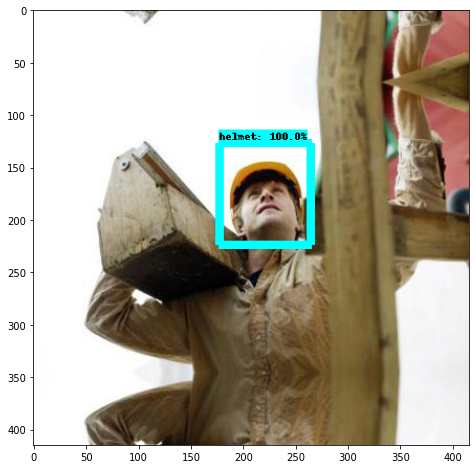

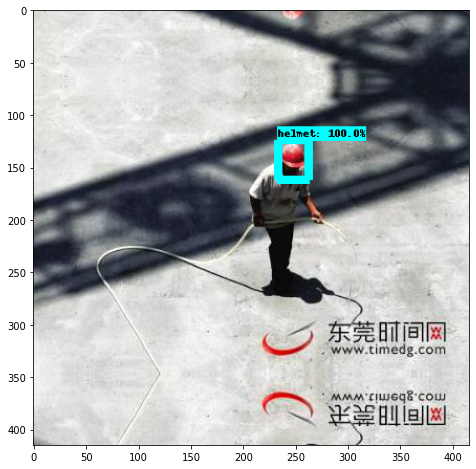

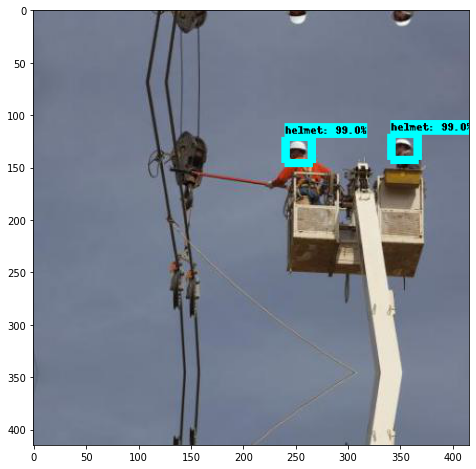

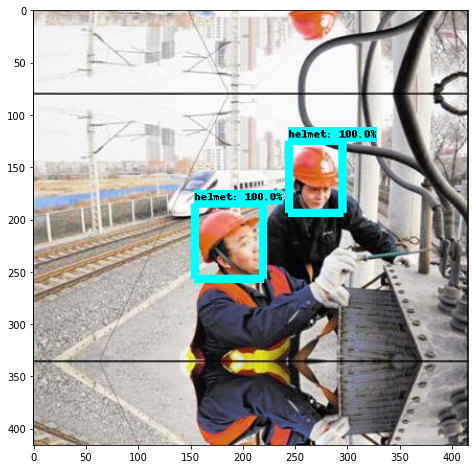

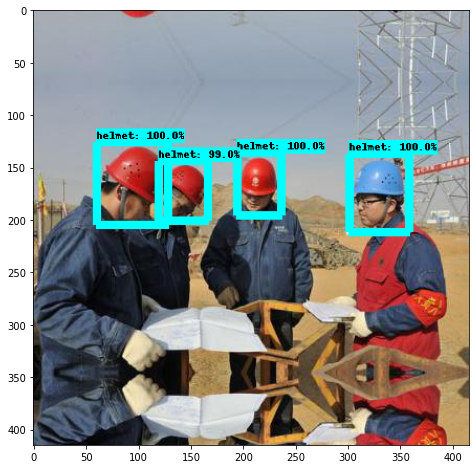

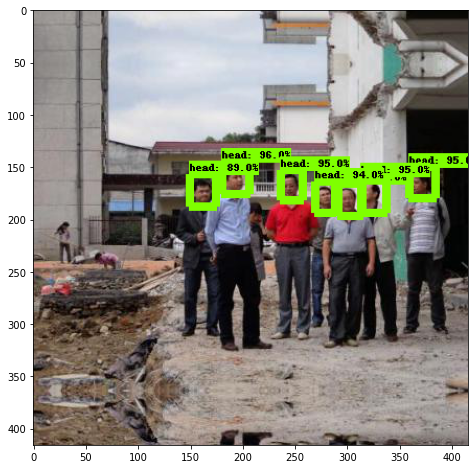

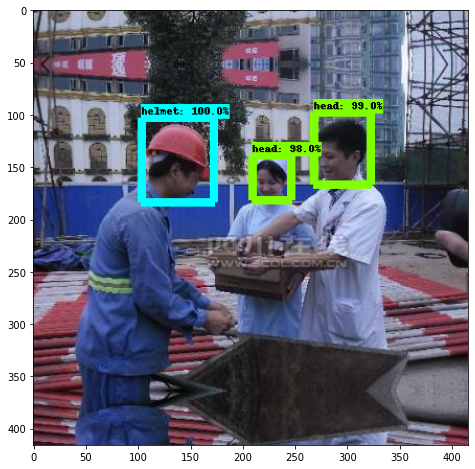

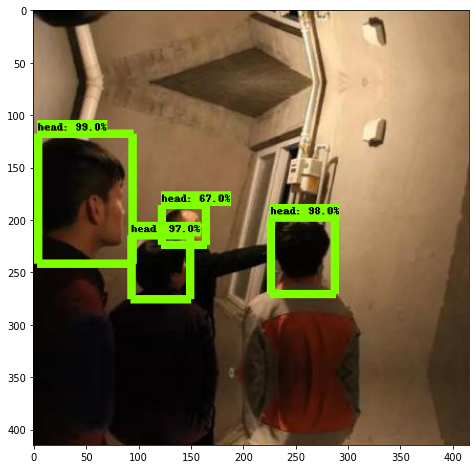

In [24]:
#To display the images with bounding boxes.
import time
start_time = time.time()
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_to_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
print("Total time taken to predict bboxes ----- %s seconds ---" % (time.time() - start_time))